In [ ]:
import sqlite3
import pandas as pd

In [ ]:
!wget https://drive.google.com/uc?id=1PQeiKF3LzBJRb6C7oYS9gXgohaHcjHMz -O Telco-Customer-Churn.csv

--2025-09-22 13:03:17--  https://drive.google.com/uc?id=1PQeiKF3LzBJRb6C7oYS9gXgohaHcjHMz
Resolving drive.google.com (drive.google.com)... 142.250.107.139, 142.250.107.101, 142.250.107.138, ...
Connecting to drive.google.com (drive.google.com)|142.250.107.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1PQeiKF3LzBJRb6C7oYS9gXgohaHcjHMz [following]
--2025-09-22 13:03:17--  https://drive.usercontent.google.com/download?id=1PQeiKF3LzBJRb6C7oYS9gXgohaHcjHMz
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 173.194.203.132, 2607:f8b0:400e:c05::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|173.194.203.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 977501 (955K) [application/octet-stream]
Saving to: ‘Telco-Customer-Churn.csv’

Telco-Customer-Chur 100%[===================>] 954.59K  --.-KB/s    in 0.01s   

2025-09-22 13:03

In [ ]:


df = pd.read_csv("Telco-Customer-Churn.csv")

# Create SQLite DB
conn = sqlite3.connect("telco.db")

# Save DataFrame into SQL table
df.to_sql("telco_churn", conn, if_exists="replace", index=False)

print("✅ Data loaded into SQLite")


✅ Data loaded into SQLite


In [ ]:

query = """
SELECT Churn, COUNT(*) AS count
FROM telco_churn
GROUP BY Churn;
"""

result = pd.read_sql(query, conn)
print(result)


  Churn  count
0    No   5174
1   Yes   1869


In [ ]:
query = """
SELECT Contract,
       COUNT(*) AS total_customers,
       SUM(CASE WHEN Churn='Yes' THEN 1 ELSE 0 END) AS churn_count,
       ROUND(SUM(CASE WHEN Churn='Yes' THEN 1 ELSE 0 END) * 100.0 / COUNT(*), 2) AS churn_rate_pct
FROM telco_churn
GROUP BY Contract
ORDER BY churn_rate_pct DESC;
"""

result = pd.read_sql(query, conn)
print(result)


         Contract  total_customers  churn_count  churn_rate_pct
0  Month-to-month             3875         1655           42.71
1        One year             1473          166           11.27
2        Two year             1695           48            2.83


In [ ]:
query = """
        SELECT
            COUNT(*) AS total_customers,
            SUM(CASE WHEN Churn='Yes' THEN 1 ELSE 0 END) AS churn_count,
            SUM(CASE WHEN Churn='No' THEN 1 ELSE 0 END) AS non_churn_count,
            ROUND(SUM(CASE WHEN Churn='Yes' THEN 1 ELSE 0 END) * 100.0 / COUNT(*), 2) AS churn_rate_pct
        FROM telco_churn;
"""

result = pd.read_sql(query, conn)
print(result)

   total_customers  churn_count  non_churn_count  churn_rate_pct
0             7043         1869             5174           26.54


churn_by_contract

In [ ]:
query = """SELECT Contract,
               COUNT(*) AS total_customers,
               SUM(CASE WHEN Churn='Yes' THEN 1 ELSE 0 END) AS churn_count,
               ROUND(SUM(CASE WHEN Churn='Yes' THEN 1 ELSE 0 END) * 100.0 / COUNT(*), 2) AS churn_rate_pct
        FROM telco_churn
        GROUP BY Contract
        ORDER BY churn_rate_pct DESC;"""

result = pd.read_sql(query, conn)
print(result)

         Contract  total_customers  churn_count  churn_rate_pct
0  Month-to-month             3875         1655           42.71
1        One year             1473          166           11.27
2        Two year             1695           48            2.83


chrun by payment

In [ ]:
query = """SELECT PaymentMethod,
               COUNT(*) AS total_customers,
               SUM(CASE WHEN Churn='Yes' THEN 1 ELSE 0 END) AS churn_count,
               ROUND(SUM(CASE WHEN Churn='Yes' THEN 1 ELSE 0 END) * 100.0 / COUNT(*), 2) AS churn_rate_pct
        FROM telco_churn
        GROUP BY PaymentMethod
        ORDER BY churn_rate_pct DESC;"""
result = pd.read_sql(query, conn)
print(result)

               PaymentMethod  total_customers  churn_count  churn_rate_pct
0           Electronic check             2365         1071           45.29
1               Mailed check             1612          308           19.11
2  Bank transfer (automatic)             1544          258           16.71
3    Credit card (automatic)             1522          232           15.24


churn by internet


In [ ]:
query = """SELECT InternetService,
               COUNT(*) AS total_customers,
               SUM(CASE WHEN Churn='Yes' THEN 1 ELSE 0 END) AS churn_count,
               ROUND(SUM(CASE WHEN Churn='Yes' THEN 1 ELSE 0 END) * 100.0 / COUNT(*), 2) AS churn_rate_pct
        FROM telco_churn
        GROUP BY InternetService
        ORDER BY churn_rate_pct DESC;"""
result = pd.read_sql(query, conn)
print(result)

  InternetService  total_customers  churn_count  churn_rate_pct
0     Fiber optic             3096         1297           41.89
1             DSL             2421          459           18.96
2              No             1526          113            7.40


tenure distribution


In [ ]:
query = """ SELECT
            CASE
                WHEN tenure BETWEEN 0 AND 12 THEN '0-12 months'
                WHEN tenure BETWEEN 13 AND 24 THEN '13-24 months'
                WHEN tenure BETWEEN 25 AND 36 THEN '25-36 months'
                WHEN tenure BETWEEN 37 AND 48 THEN '37-48 months'
                WHEN tenure BETWEEN 49 AND 60 THEN '49-60 months'
                ELSE '61+ months'
            END AS tenure_band,
            COUNT(*) AS total_customers,
            SUM(CASE WHEN Churn='Yes' THEN 1 ELSE 0 END) AS churn_count,
            ROUND(SUM(CASE WHEN Churn='Yes' THEN 1 ELSE 0 END) * 100.0 / COUNT(*), 2) AS churn_rate_pct
        FROM telco_churn
        GROUP BY tenure_band
        ORDER BY churn_rate_pct DESC;
        """
result = pd.read_sql(query, conn)
print(result)

    tenure_band  total_customers  churn_count  churn_rate_pct
0   0-12 months             2186         1037           47.44
1  13-24 months             1024          294           28.71
2  25-36 months              832          180           21.63
3  37-48 months              762          145           19.03
4  49-60 months              832          120           14.42
5    61+ months             1407           93            6.61


"monthly_charges_vs_churn

In [ ]:
query = """
        SELECT Churn,
               ROUND(AVG(MonthlyCharges), 2) AS avg_monthly_charges,
               ROUND(AVG(TotalCharges), 2) AS avg_total_charges
        FROM telco_churn
        GROUP BY Churn;
    """

result = pd.read_sql(query, conn)
print(result)

  Churn  avg_monthly_charges  avg_total_charges
0    No                61.27            2549.91
1   Yes                74.44            1531.80


In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier


In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df.isna().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
cust_ids = pd.read_csv("Telco-Customer-Churn.csv")["customerID"]
contract_df = pd.read_csv("Telco-Customer-Churn.csv")["Contract"]
payment_df = pd.read_csv("Telco-Customer-Churn.csv")["PaymentMethod"]
internet_df = pd.read_csv("Telco-Customer-Churn.csv")["InternetService"]

In [ ]:


df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
df["TotalCharges"].fillna(df["TotalCharges"].median(), inplace=True)




/tmp/ipython-input-420118841.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["TotalCharges"].fillna(df["TotalCharges"].median(), inplace=True)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df["Churn"] = df["Churn"].map({"Yes": 1, "No": 0})

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df.nunique()

,0
customerID,7043
gender,2
SeniorCitizen,2
Partner,2
Dependents,2
tenure,73
PhoneService,2
MultipleLines,3
InternetService,3
OnlineSecurity,3


In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [ ]:
df.drop("customerID", axis=1, inplace=True)

In [ ]:
# Label encoding for binary cols, one-hot for multi-category
binary_cols = [col for col in df.columns if df[col].nunique() == 2]
multi_cols = [col for col in df.columns if df[col].dtype == "object" and col not in binary_cols]
# Encode binary
for col in binary_cols:
  df[col] = LabelEncoder().fit_transform(df[col])
# One-hot encode multi-category
df = pd.get_dummies(df, columns=multi_cols, drop_first=True)
df.shape

(7043, 31)

In [ ]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,...,False,False,False,False,False,False,False,False,True,False
1,1,0,0,0,34,1,0,56.95,1889.50,0,...,False,False,False,False,False,True,False,False,False,True
2,1,0,0,0,2,1,1,53.85,108.15,1,...,False,False,False,False,False,False,False,False,False,True
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,True,False,False,False,False,True,False,False,False,False
4,0,0,0,0,2,1,1,70.70,151.65,1,...,False,False,False,False,False,False,False,False,True,False


In [ ]:
X = df.drop("Churn", axis=1)
y = df["Churn"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)

print("🔹 Logistic Regression")
print(classification_report(y_test, y_pred_lr))


🔹 Logistic Regression
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1035
           1       0.66      0.57      0.61       374

    accuracy                           0.81      1409
   macro avg       0.75      0.73      0.74      1409
weighted avg       0.80      0.81      0.80      1409



In [ ]:
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("🔹 Random Forest")
print(classification_report(y_test, y_pred_rf))


🔹 Random Forest
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1035
           1       0.63      0.49      0.55       374

    accuracy                           0.79      1409
   macro avg       0.73      0.69      0.71      1409
weighted avg       0.78      0.79      0.78      1409



In [ ]:
gb = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)

print("🔹 Gradient Boosting")
print(classification_report(y_test, y_pred_gb))


🔹 Gradient Boosting
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1035
           1       0.64      0.51      0.57       374

    accuracy                           0.79      1409
   macro avg       0.74      0.70      0.72      1409
weighted avg       0.78      0.79      0.79      1409



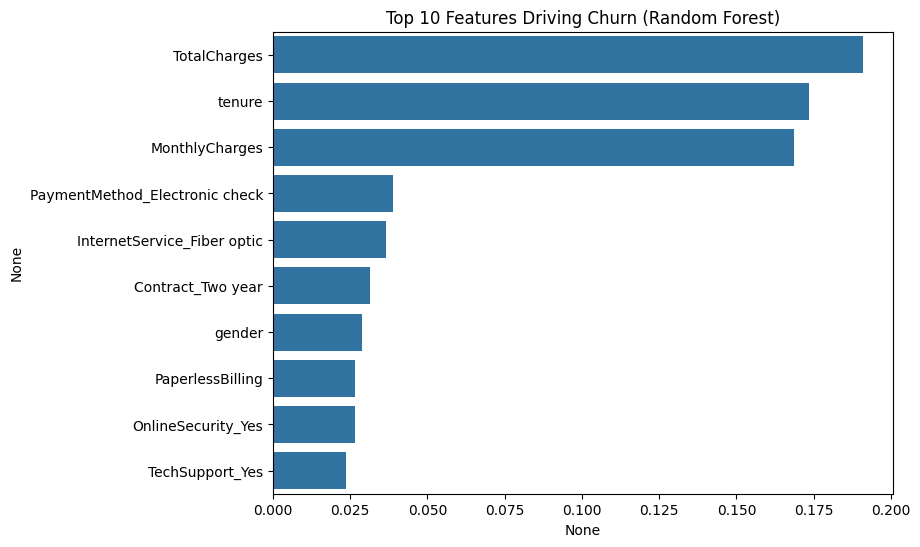

In [ ]:
importances = pd.Series(rf.feature_importances_, index=X.columns)
top_features = importances.sort_values(ascending=False).head(10)

plt.figure(figsize=(8,6))
sns.barplot(x=top_features, y=top_features.index)
plt.title("Top 10 Features Driving Churn (Random Forest)")
plt.show()


In [ ]:
print("LogReg AUC:", roc_auc_score(y_test, log_reg.predict_proba(X_test)[:,1]))
print("RF AUC:", roc_auc_score(y_test, rf.predict_proba(X_test)[:,1]))
print("GB AUC:", roc_auc_score(y_test, gb.predict_proba(X_test)[:,1]))


LogReg AUC: 0.8415846443979436
RF AUC: 0.823247823503578
GB AUC: 0.8360019633676924


In [ ]:
# 1. Retraining with gradient boosting
final_model = GradientBoostingClassifier(
    n_estimators=200, learning_rate=0.1, random_state=42
)
final_model.fit(X, y)

GradientBoostingClassifier(n_estimators=200, random_state=42)

In [ ]:
df_results = df.copy()  # keep original
df_results["churn_probability"] = final_model.predict_proba(X)[:, 1]
df_results["churn_prediction"] = final_model.predict(X)


In [ ]:


df_results["customerID"] = cust_ids
df_results["Contract"] = contract_df
df_results["PaymentMethod"] = payment_df
df_results["InternetService"] = internet_df

In [ ]:
df_results.to_csv("churn_predictions.csv", index=False)
print("✅ Churn predictions exported to churn_predictions.csv")
df_results.head()

✅ Churn predictions exported to churn_predictions.csv


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,churn_probability,churn_prediction,customerID,Contract,PaymentMethod,InternetService
0,0,0,1,0,1,0,1,29.85,29.85,0,...,False,False,True,False,0.294130,0,7590-VHVEG,Month-to-month,Electronic check,DSL
1,1,0,0,0,34,1,0,56.95,1889.50,0,...,False,False,False,True,0.039664,0,5575-GNVDE,One year,Mailed check,DSL
2,1,0,0,0,2,1,1,53.85,108.15,1,...,False,False,False,True,0.462738,0,3668-QPYBK,Month-to-month,Mailed check,DSL
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,False,False,False,False,0.066446,0,7795-CFOCW,One year,Bank transfer (automatic),DSL
4,0,0,0,0,2,1,1,70.70,151.65,1,...,False,False,True,False,0.634430,1,9237-HQITU,Month-to-month,Electronic check,Fiber optic
